In [825]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import plotly.offline as pyo

# Suppress all warnings
warnings.filterwarnings("ignore")

#Upload from CSVs
meat_pop_path = "New Files/meat_totals.csv"
us_temps_path = "New Files/global_temps_country.csv"
global_temps_path = "New Files/global_temps.csv"
climate_path = "New Files/climdiv_state_year.csv"
methane_path = "New Files/methane_levels_annual.csv"
co2_path = "New Files/monthly_co2.csv"
miami_path = "New Files/Miami.csv"
phoenix_path = "New Files/Phoenix.csv"
dc_path = "New Files/dc.csv"
topeka_path = "New Files/Topeka.csv"
crops_path = "New Files/crop_production.csv"
greenhouse_path = "New Files/Greenhouse_gas.csv"

#Read data and results
meat_pop_df = pd.read_csv(meat_pop_path)
us_temps_df = pd.read_csv(us_temps_path)
global_temps_df = pd.read_csv(global_temps_path)
climate_df = pd.read_csv(climate_path)
methane_df = pd.read_csv(methane_path)
co2_df= pd.read_csv(co2_path)
miami_df = pd.read_csv(miami_path)
phoenix_df = pd.read_csv(phoenix_path)
dc_df = pd.read_csv(dc_path)
topeka_df = pd.read_csv(topeka_path)
crops_df = pd.read_csv(crops_path)
greenhouse_gas_df = pd.read_csv(greenhouse_path)
methane_levels_df = pd.read_csv(methane_path)
topeka_df.head()

,Year,Avg Temp,Avg Tmax,Avg Tmin,ToT Prcp
0,1888,51.78,64.09,39.48,33.96
1,1889,52.97,65.39,40.55,38.90
2,1890,54.00,66.57,41.44,27.29
3,1891,53.03,64.77,41.30,43.58
4,1892,53.12,63.48,42.76,41.37


In [826]:
#Remove Error Message "https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy"
pd.options.mode.copy_on_write = True 

## Meat Analysis

In [827]:
# Look at Data types and modify if necessary
meat_pop_df.dtypes


Month                      int64
Day                        int64
Year                       int64
beef_commercial          float64
veal_commercial          float64
pork_commercial          float64
lamb_commercial          float64
total_red_commercial     float64
beef_federal             float64
veal_federal             float64
pork_federal             float64
lamb_federal             float64
total_red_federal        float64
broilers_federal         float64
chicken_federal          float64
turkey_federal           float64
total_poultry_federal    float64
total_meat_federal       float64
dtype: object

In [828]:
#Find total red meat overall and make new column
meat_pop_df["total_red_meat"] = meat_pop_df["total_red_commercial"]+meat_pop_df["total_red_federal"]

meat_pop_df.head()

,Month,Day,Year,beef_commercial,veal_commercial,pork_commercial,lamb_commercial,total_red_commercial,beef_federal,veal_federal,pork_federal,lamb_federal,total_red_federal,broilers_federal,chicken_federal,turkey_federal,total_poultry_federal,total_meat_federal,total_red_meat
0,2,1,2024,2168.5,3.6,2371.2,10.9,4554.2,2135.0,3.4,2361.4,9.8,4509.6,3734.3,44.4,423.9,4213.3,8722.9,9063.8
1,1,1,2024,2280.8,3.9,2472.7,10.6,4768.0,2246.1,3.8,2462.4,9.6,4721.9,4051.4,47.4,435.2,4547.6,9269.5,9489.9
2,12,1,2023,2189.9,3.9,2342.0,10.7,4546.4,2159.0,3.7,2332.4,9.5,4504.7,3616.2,41.5,393.0,4063.1,8567.8,9051.1
3,11,1,2023,2280.9,4.3,2388.2,11.2,4684.5,2247.3,4.1,2377.4,10.1,4638.9,3817.3,44.5,449.2,4324.0,8962.9,9323.4
4,10,1,2023,2340.9,4.2,2418.5,11.3,4774.8,2300.8,4.0,2406.2,9.8,4720.8,4177.3,51.0,500.5,4742.1,9462.9,9495.6


In [829]:
#Look for only 1977 and after because null values before that
meat_pop_1977_df = meat_pop_df.loc[meat_pop_df["Year"]>=1977]

#Pull only columns needed
meat_pop_1977_df = meat_pop_1977_df[["Month", "Year", "total_red_meat"]]

#Drop Null Values

meat_pop_1977_df = meat_pop_1977_df.dropna()

#Drop 2024 because not all months
meat_pop_1977_df = meat_pop_1977_df.loc[meat_pop_1977_df["Year"]<2024]

#Reduce Dataframe
meat_pop_1977_df.head()

,Month,Year,total_red_meat
2,12,2023,9051.1
3,11,2023,9323.4
4,10,2023,9495.6
5,9,2023,8651.6
6,8,2023,9298.2


In [830]:
#Group Meat Pop and find totals per year
meat_avgs_df = meat_pop_1977_df.groupby("Year")["total_red_meat"].sum()

#Make DataFrame
meat_avgs_df = pd.DataFrame(meat_avgs_df)

#Reset Index
meat_avgs_df = meat_avgs_df.reset_index()

meat_avgs_df.head()

,Year,total_red_meat
0,1977,75952.9
1,1978,74168.2
2,1979,72539.7
3,1980,75201.6
4,1981,75472.7


## Climate Analysis

In [831]:
#Sort Climate numbers
climate_df = climate_df.loc[climate_df["year"]>=1977]

#Reduce to only columns needed
climate_df = climate_df[["year", "tempc"]]

climate_df

,year,tempc
82,1977,16.921296
83,1978,16.592593
84,1979,16.310185
85,1980,16.925926
86,1981,16.657407
...,...,...
5995,2015,6.754630
5996,2016,6.615741
5997,2017,6.222222
5998,2018,5.782407


In [832]:
#Drop duplicates
climate_df = climate_df.drop_duplicates(subset="year")

#Rename Columns
climate_df = climate_df.rename(columns={"year":"Year"})
#Check Value Counts
climate_df.value_counts()

Year  tempc    
1977  16.921296    1
2009  17.171296    1
2001  17.240741    1
2002  17.541667    1
2003  17.074074    1
2004  17.407407    1
2005  17.439815    1
2006  17.888889    1
2007  18.000000    1
2008  17.175926    1
2010  17.060185    1
1999  17.856481    1
2011  17.685185    1
2012  18.287037    1
2013  17.000000    1
2014  16.685185    1
2015  18.120370    1
2016  18.523148    1
2017  18.351852    1
2018  18.027778    1
2000  17.537037    1
1998  18.402778    1
1978  16.592593    1
1987  17.245370    1
1979  16.310185    1
1980  16.925926    1
1981  16.657407    1
1982  17.412037    1
1983  16.217593    1
1984  17.120370    1
1985  17.106481    1
1986  17.828704    1
1988  16.708333    1
1997  16.870370    1
1989  16.777778    1
1990  18.287037    1
1991  17.754630    1
1992  16.726852    1
1993  16.847222    1
1994  17.250000    1
1995  17.240741    1
1996  16.736111    1
2019  18.541667    1
Name: count, dtype: int64

In [833]:
#Merge Climate and Red Meat
climate_meat_df = pd.merge(climate_df, meat_avgs_df, how = "inner", on="Year")

climate_meat_df.head()

,Year,tempc,total_red_meat
0,1977,16.921296,75952.9
1,1978,16.592593,74168.2
2,1979,16.310185,72539.7
3,1980,16.925926,75201.6
4,1981,16.657407,75472.7


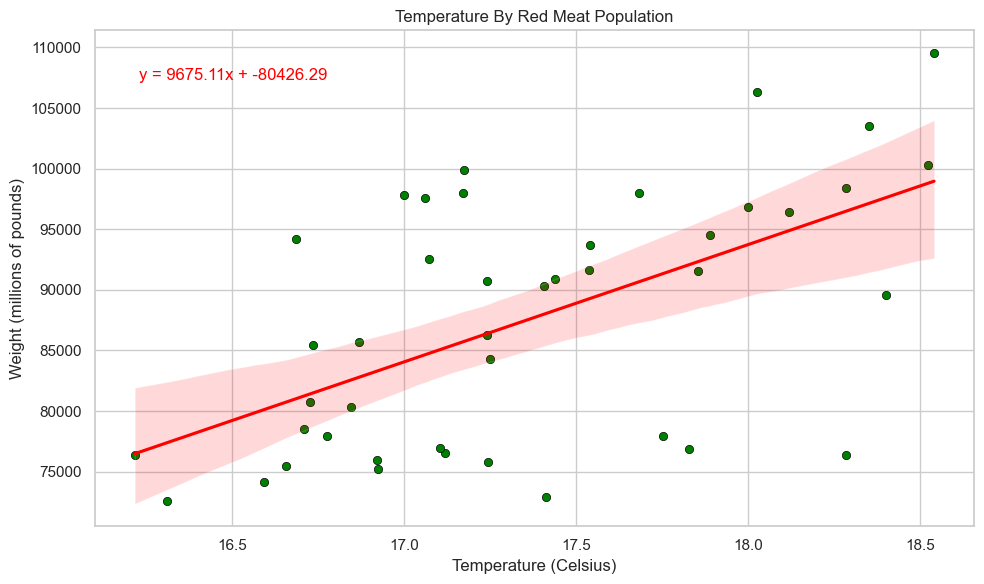

In [834]:
# production of red meat using seaborn

# Scatter plot with regression line 
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=climate_meat_df, x="tempc", y="total_red_meat", color="green", edgecolor="black")
sns.regplot(data=climate_meat_df, x="tempc", y="total_red_meat", scatter=False, color="red")

# Adding regression equation
x = climate_meat_df["tempc"]
y = climate_meat_df["total_red_meat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding labels and title
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Weight (millions of pounds)")
plt.title("Temperature By Red Meat Population")

# Save the plot
# plt.savefig("red_meat_population_regression.png")

plt.tight_layout()
plt.show()


In [835]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(climate_meat_df, x="tempc", y="total_red_meat", trendline="ols", 
                 trendline_color_override="red", labels={"tempc": "Temperature", "total_red_meat": "Weight (millions of pounds)"},
                 title="Red Meat Population vs Temperature")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

In [836]:
#Year vs Red meat Plotly

# Create the interactive plot using Plotly
fig = px.line(climate_meat_df, x="Year", y="total_red_meat",
              title="Red Meat Population per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Weight (millions of pounds)")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

## Poultry Analysis

In [837]:
#POULTRY Look for only 1977 and after because null values before that
poul_pop_1977_df = meat_pop_df.loc[meat_pop_df["Year"]>=1977]

#Pull only columns needed


poul_pop_1977_df = poul_pop_1977_df[["Year", "total_poultry_federal"]]

poul_pop_1977_df

,Year,total_poultry_federal
0,2024,4213.3
1,2024,4547.6
2,2023,4063.1
3,2023,4324.0
4,2023,4742.1
...,...,...
562,1977,969.7
563,1977,877.1
564,1977,918.9
565,1977,763.9


In [838]:
#Poultry Totals
poul_totals_df = poul_pop_1977_df.groupby("Year")["total_poultry_federal"].sum()

poul_totals_df = pd.DataFrame(poul_totals_df)

poul_totals_df = poul_totals_df.reset_index()

poul_totals_df.head()

,Year,total_poultry_federal
0,1977,11696.6
1,1978,12447.4
2,1979,13733.1
3,1980,14232.9
4,1981,15058.3


In [839]:
#Merge poultry totals and climate
poul_temps_df = pd.merge(poul_totals_df, climate_df, how="inner", on="Year")

poul_temps_df.head()

,Year,total_poultry_federal,tempc
0,1977,11696.6,16.921296
1,1978,12447.4,16.592593
2,1979,13733.1,16.310185
3,1980,14232.9,16.925926
4,1981,15058.3,16.657407


In [840]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(poul_temps_df, x="tempc", y="total_poultry_federal", trendline="ols", 
                 trendline_color_override="red", labels={"tempc": "Average Temperature", "total_poultry_federal": "Weight (millions of pounds)"},
                 title="Poultry Population vs Temperature")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

In [841]:
#Filter out 2024 of Poul_temps
poul_totals_df = poul_totals_df.loc[poul_totals_df["Year"]<2024]

poul_totals_df.tail()

,Year,total_poultry_federal
42,2019,50395.1
43,2020,50993.1
44,2021,51121.4
45,2022,52140.1
46,2023,52579.7


In [842]:
# Plot using plotly

# Create the interactive plot using Plotly
fig = px.line(poul_totals_df, x="Year", y="total_poultry_federal",
              title="Poultry Population per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Weight (millions of pounds)")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

## Methane Analysis

In [843]:
#Rename year column methane
methane_df = methane_df.rename(columns={"year":"Year"})

#Merge Methane and red meat

methane_red_df = pd.merge(methane_df, climate_meat_df, how="inner", on="Year")

methane_red_df.head()

,Year,mean,unc,tempc,total_red_meat
0,1984,1644.68,0.67,17.120370,76546.2
1,1985,1657.29,0.59,17.106481,76933.2
2,1986,1670.08,0.74,17.828704,76900.3
3,1987,1682.70,0.49,17.245370,75826.5
4,1988,1693.11,0.67,16.708333,78534.6


In [844]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(methane_red_df, x="total_red_meat", y="mean", trendline="ols", 
                 trendline_color_override="red", labels={"mean": "Mean Methane Levels", "total_red_meat": "Weight (millions of pounds)"},
                 title="Methane Levels vs. Red Meat Population")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

In [845]:
# Methane levels plotly

# Create the interactive plot using Plotly
fig = px.line(methane_df, x="Year", y="mean",
              title="Methane Levels per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Mean Methane Level")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

## CO2 Analysis

In [846]:
#CO2 Levels
#Filter Columns
co2_df = co2_df[["Year", "CO2_ppm"]]

#Group by to find mean
co2_df = co2_df.groupby("Year").mean()

#Reset Index
co2_df = co2_df.reset_index()



In [847]:
#Drop 2024 because not full year yet
co2_df = co2_df.loc[(co2_df["Year"]<2024) & (co2_df["Year"]>=1970)]
co2_df.tail()

,Year,CO2_ppm
61,2019,411.424167
62,2020,413.946667
63,2021,416.113333
64,2022,418.218333
65,2023,420.781667


In [848]:
# CO2 levels plotly

# Create the interactive plot using Plotly
fig = px.line(co2_df, x="Year", y="CO2_ppm",
              title="CO2 Levels per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Mean CO2 Level (ppm)")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

## Precipitation Analysis

In [849]:
#Miami rainfall

#Reduce dataframe
miami_df = miami_df[["Year", "ToT Prcp"]]

#Filter by year
miami_df = miami_df.loc[miami_df["Year"]>=1940]



In [850]:
#Phoenix rainfall
#Reduce DataFrame
phoenix_df = phoenix_df[["Year", "ToT Prcp"]]

#Filter by year
phoenix_df = phoenix_df.loc[phoenix_df["Year"]>=1940]


In [851]:
#DC Rainfall
dc_df = dc_df[["Year", "ToT Prcp"]]

#Filter by Year
dc_df = dc_df.loc[dc_df["Year"]>=1940]


## Temperature Analysis

In [852]:
#Clean Global Temps
#Drop Null
global_temps_df = global_temps_df.dropna()

global_temps_df = global_temps_df.sort_values(by="Year")

In [853]:
#Group by month
july_df = global_temps_df.loc[global_temps_df["Month"]==7]
july_df = july_df.drop_duplicates("Year")

august_df = global_temps_df.loc[global_temps_df["Month"]==8]
august_df = august_df.drop_duplicates("Year")

june_df = global_temps_df.loc[global_temps_df["Month"]==6]
june_df = june_df.drop_duplicates("Year")

dec_df = global_temps_df.loc[global_temps_df["Month"]==12]
dec_df = dec_df.drop_duplicates("Year")

jan_df = global_temps_df.loc[global_temps_df["Month"]==1]
jan_df = jan_df.drop_duplicates("Year")

feb_df = global_temps_df.loc[global_temps_df["Month"]==2]
feb_df = feb_df.drop_duplicates("Year")

In [854]:
us_temps_df.tail()

,month,day,year,AverageTemperature,AverageTemperatureUncertainty,Country
1360,6,1,2010,19.885,0.182,United States
1361,7,1,2010,22.078,0.229,United States
1362,8,1,2010,21.703,0.256,United States
1363,9,1,2010,17.384,0.113,United States
1364,10,1,2010,10.913,0.053,United States


In [855]:
#Rename to match meat data frame
us_temps_df = us_temps_df.rename(columns={"year":"Year", "month":"Month"})

us_temps_df.dtypes
# #Filter to 1977
us_temps_1950_df = us_temps_df.loc[(us_temps_df["Year"]>=1950) & (us_temps_df["Year"]<2010)]


#reduce
us_temps_1950_df = us_temps_1950_df[["Year", "Month", "AverageTemperature"]]
us_temps_1950_df.head()

,Year,Month,AverageTemperature
464,1950,1,-2.893
465,1950,2,-1.757
466,1950,3,1.993
467,1950,4,7.100
468,1950,5,13.451


In [856]:
#Mean by year
us_temps_grouped_df = us_temps_1950_df.groupby("Year")["AverageTemperature"].mean()
us_temps_grouped_df = pd.DataFrame(us_temps_grouped_df)
#Reset Index
us_temps_grouped_df = us_temps_grouped_df.reset_index()
us_temps_grouped_df.head()

,Year,AverageTemperature
0,1950,8.656417
1,1951,8.416583
2,1952,8.979417
3,1953,9.530417
4,1954,9.410583


## Crop Analysis

In [857]:
#Filter by USA
crops_df = crops_df.loc[crops_df["LOCATION"]=="USA"]

#Find Unique Values
crops_df["SUBJECT"].unique()

array(['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN'], dtype=object)

In [858]:
#Sort by types
crops_wheat_df = crops_df.loc[(crops_df["SUBJECT"]=="RICE") & (crops_df["MEASURE"]=="TONNE_HA") & (crops_df["TIME"]<2024)]

crops_rice_df = crops_df.loc[(crops_df["SUBJECT"]=="WHEAT") & (crops_df["MEASURE"]=="TONNE_HA")& (crops_df["TIME"]<2024)]

crops_maize_df = crops_df.loc[(crops_df["SUBJECT"]=="MAIZE") & (crops_df["MEASURE"]=="TONNE_HA")& (crops_df["TIME"]<2024)]

crops_soybean_df = crops_df.loc[(crops_df["SUBJECT"]=="SOYBEAN") & (crops_df["MEASURE"]=="TONNE_HA")& (crops_df["TIME"]<2024)]

In [859]:
#Reduce Columns
crops_wheat_df = crops_wheat_df[["SUBJECT", "TIME", "VALUE"]]

crops_rice_df = crops_rice_df[["SUBJECT", "TIME", "VALUE"]]

crops_maize_df = crops_maize_df[["SUBJECT", "TIME", "VALUE"]]

crops_soybean_df = crops_soybean_df[["SUBJECT", "TIME", "VALUE"]]

In [860]:
#Filter by year
climate_df = climate_df.loc[climate_df["Year"]>=1990]

#Rename Columns
climate_df = climate_df.rename(columns={"Year":"TIME"})

In [861]:
#Merge with Maize
climate_maize_df = pd.merge(climate_df, crops_maize_df, how="inner", on = "TIME")

climate_maize_df.head()

,TIME,tempc,SUBJECT,VALUE
0,1990,18.287037,MAIZE,7.433033
1,1991,17.754630,MAIZE,6.819797
2,1992,16.726852,MAIZE,8.250576
3,1993,16.847222,MAIZE,6.322854
4,1994,17.250000,MAIZE,8.698690


In [862]:
crops_df.head()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,VALUE
468,468,USA,CROPYIELD,RICE,TONNE_HA,A,1990,4.313679
469,469,USA,CROPYIELD,RICE,TONNE_HA,A,1991,4.468591
470,470,USA,CROPYIELD,RICE,TONNE_HA,A,1992,4.473428
471,471,USA,CROPYIELD,RICE,TONNE_HA,A,1993,4.301207
472,472,USA,CROPYIELD,RICE,TONNE_HA,A,1994,4.651018


## Analysing data to show the top 5 states with high carbon emissions and low carbon emissions

In [863]:

# Define the mapping for renaming the columns  for 
greenhouse_gas_df.shape

# Rename the first column to 'state'
greenhouse_gas_df.rename(columns={'Greenhouse Gas Gross Total, MMT CO2 eq.': 'State'}, inplace=True)

# Drop any rows with null values
greenhouse_gas_df.dropna(inplace=True)

greenhouse_gas_df.head()

,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Texas,769.428559,765.481765,768.990297,783.811505,794.173268,799.716048,843.692709,849.406999,850.167559,...,824.500900,873.055260,871.676409,867.446510,840.231093,856.336462,888.675695,893.843084,826.288454,873.111539
1,California,439.398119,426.194349,438.998438,423.329160,438.153103,426.688029,428.107017,431.040902,441.153078,...,417.064830,419.847387,414.560614,419.879307,416.035538,418.208025,418.190503,421.601360,373.767695,393.353676
2,Florida,215.191470,215.013382,218.273206,225.860117,230.902397,236.294155,243.619286,246.747366,259.082168,...,261.944999,260.570527,266.830699,270.668309,276.985293,277.536753,282.910424,274.710201,253.678081,269.966159
3,Pennsylvania,303.251839,301.546747,306.073218,311.193376,310.839823,315.060961,324.300896,325.308529,321.618778,...,286.189617,299.850180,297.937608,283.629116,270.766996,275.144722,280.941451,277.227680,251.813293,267.725164
4,Ohio,301.030972,298.711137,303.877790,308.294480,305.184804,311.363650,321.938450,316.142136,316.229152,...,252.755065,265.350095,264.868608,249.194132,240.674894,242.297796,249.354767,232.372100,222.791865,235.415359


In [864]:
greenhouse_gas_df.columns 


Index(['State', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [865]:
greenhouse_gas_df['State'].unique()

array(['Texas', 'California', 'Florida', 'Pennsylvania', 'Ohio',
       'Louisiana', 'Illinois', 'Indiana', 'New York', 'Michigan',
       'Missouri', 'Georgia', 'North Carolina', 'Kentucky', 'Alabama',
       'Oklahoma', 'Minnesota', 'Wisconsin', 'Colorado', 'Virginia',
       'West Virginia', 'Iowa', 'Tennessee', 'Kansas', 'Arizona',
       'New Jersey', 'North Dakota', 'Arkansas', 'Washington', 'Nebraska',
       'Wyoming', 'South Carolina', 'Mississippi', 'Utah', 'New Mexico',
       'Maryland', 'Massachusetts', 'Montana', 'Oregon', 'Nevada',
       'South Dakota', 'Connecticut', 'Alaska', 'Idaho', 'Hawaii',
       'Maine', 'New Hampshire', 'Delaware', 'Rhode Island', 'Vermont',
       'District Of Columbia'], dtype=object)

In [866]:
# Sort the DataFrame by carbon emissions in descending order
sorted_df = greenhouse_gas_df.sort_values(by='1990', ascending=False)

# Select the top 5 states with the highest carbon emissions
top_5_states_highest_emissions = sorted_df.head(5)['State'].tolist()

# Select the bottom 5 states with the lowest carbon emissions
bottom_5_states_lowest_emissions = sorted_df.tail(5)['State'].tolist()

# Print the top 5 states with the highest carbon emissions
print("Top 5 states with the highest carbon emissions:")
print(top_5_states_highest_emissions)

# Print the bottom 5 states with the lowest carbon emissions
print("\nBottom 5 states with the lowest carbon emissions:")
print(bottom_5_states_lowest_emissions)

Top 5 states with the highest carbon emissions:
['Texas', 'California', 'Pennsylvania', 'Ohio', 'Illinois']

Bottom 5 states with the lowest carbon emissions:
['Delaware', 'New Hampshire', 'Rhode Island', 'Vermont', 'District Of Columbia']


In [867]:
# Sort the DataFrame by carbon emissions in descending order
sorted_df = greenhouse_gas_df.sort_values(by='1990', ascending=False)

# Select the top 5 states with the highest carbon emissions and their corresponding emissions values
top_5_states_highest_emissions = sorted_df.head(5)[['State', '1990']].values

# Select the bottom 5 states with the lowest carbon emissions and their corresponding emissions values
bottom_5_states_lowest_emissions = sorted_df.tail(5)[['State', '1990']].values

In [868]:
# create df to use for plotting 
top_5_states_highest_emissions_data = [
    ['Texas', 769.4285588063276],
    ['California', 439.39811845295],
    ['Pennsylvania', 303.25183939006087],
    ['Ohio', 301.03097232999573],
    ['Illinois', 253.8883962714412]
]

bottom_5_states_lowest_emissions_data = [
    ['District Of Columbia', 4.9082174496745],
    ['Vermont', 7.649251162936002],
    ['Rhode Island', 10.2410289278132],
    ['New Hampshire', 16.8721642445757],
    ['Delaware', 19.7130992749581]
]

# Create DataFrames
top_5_states_df = pd.DataFrame(top_5_states_highest_emissions_data, columns=['State', 'Emissions'])
bottom_5_states_df = pd.DataFrame(bottom_5_states_lowest_emissions_data, columns=['State', 'Emissions'])

# Displaying DataFrames
print("\nBottom 5 states with the lowest carbon emissions:")
bottom_5_states_df


Bottom 5 states with the lowest carbon emissions:


,State,Emissions
0,District Of Columbia,4.908217
1,Vermont,7.649251
2,Rhode Island,10.241029
3,New Hampshire,16.872164
4,Delaware,19.713099


In [869]:
# Displaying DataFrames
print("Top 5 states with the highest carbon emissions:")
top_5_states_df

Top 5 states with the highest carbon emissions:


,State,Emissions
0,Texas,769.428559
1,California,439.398118
2,Pennsylvania,303.251839
3,Ohio,301.030972
4,Illinois,253.888396


## Countries

In [905]:
# ND Gain Index: https://gain.nd.edu/our-work/country-index/rankings/
# Countries that will survive climate change: Is your country on it?: https://thehill.com/changing-america/sustainability/climate-change/526970-the-10-countries-most-likely-to-survive-the/

# Data
data = {
    "Country": ["Norway", "Finland", "Switzerland", "Denmark", "Singapore",
                "Sweden", "Iceland", "New Zealand", "Germany", "United Kingdom",
                "Austria", "Australia", "Luxembourg", "Canada", "Republic of Korea",
                "France", "United States", "Netherlands", "Japan", "Ireland"],
    "ND-Gain Index": [75.0, 73.9, 72.5, 71.9, 71.5,
                      71.4, 70.6, 70.3, 70.2, 70.1,
                      69.7, 68.9, 68.4, 68.1, 67.9,
                      67.5, 67.4, 66.6, 65.1, 64.0]
}

# Create DataFrame
high_countries_df = pd.DataFrame(data,index=range(1, len(data["Country"]) + 1) )

high_countries_df

,Country,ND-Gain Index
1,Norway,75.0
2,Finland,73.9
3,Switzerland,72.5
4,Denmark,71.9
5,Singapore,71.5
6,Sweden,71.4
7,Iceland,70.6
8,New Zealand,70.3
9,Germany,70.2
10,United Kingdom,70.1


# Plot in Order

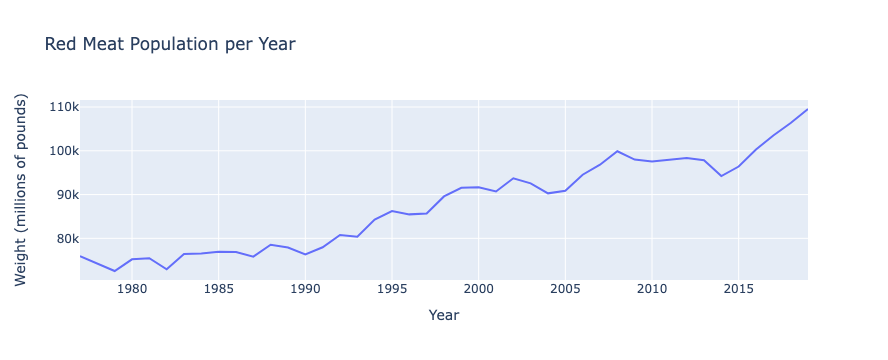

In [888]:
#Year vs Red meat Plotly

# Create the interactive plot using Plotly
fig = px.line(climate_meat_df, x="Year", y="total_red_meat",
              title="Red Meat Population per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Weight (millions of pounds)")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

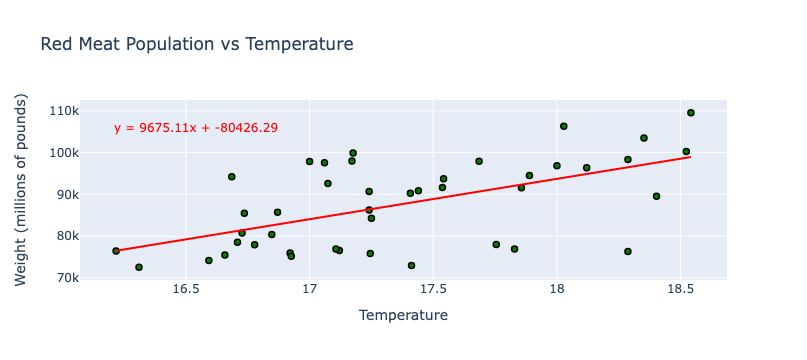

In [889]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(climate_meat_df, x="tempc", y="total_red_meat", trendline="ols", 
                 trendline_color_override="red", labels={"tempc": "Temperature", "total_red_meat": "Weight (millions of pounds)"},
                 title="Red Meat Population vs Temperature")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

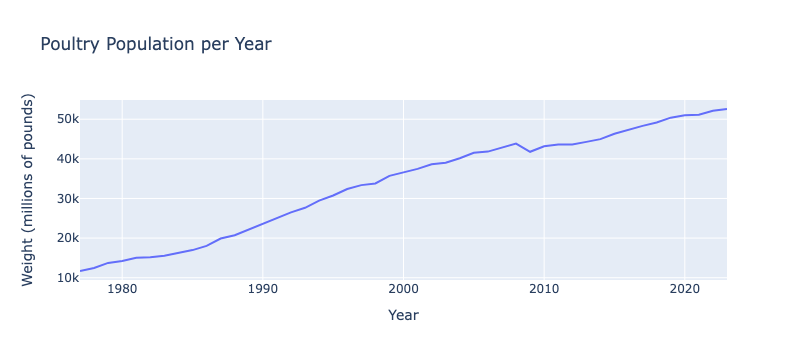

In [890]:
# Plot using plotly

# Create the interactive plot using Plotly
fig = px.line(poul_totals_df, x="Year", y="total_poultry_federal",
              title="Poultry Population per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Weight (millions of pounds)")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

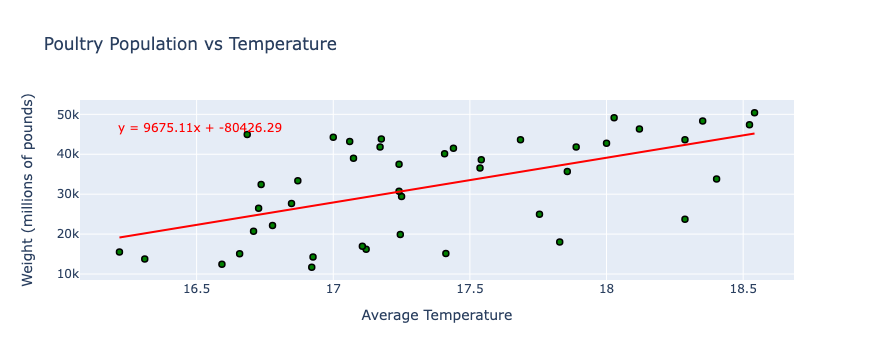

In [891]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(poul_temps_df, x="tempc", y="total_poultry_federal", trendline="ols", 
                 trendline_color_override="red", labels={"tempc": "Average Temperature", "total_poultry_federal": "Weight (millions of pounds)"},
                 title="Poultry Population vs Temperature")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

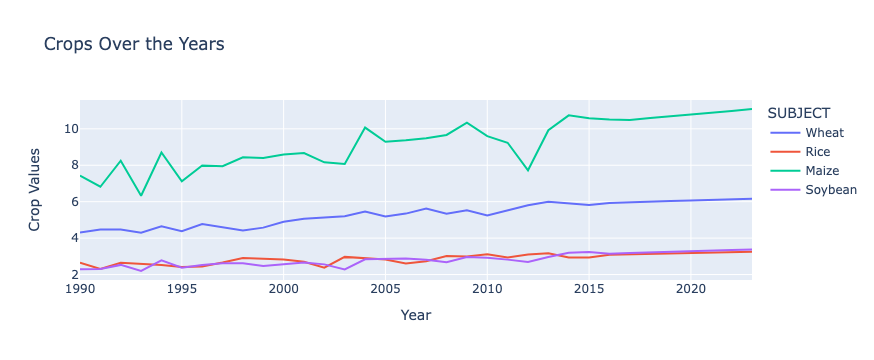

In [900]:
#Plot Values

# Concatenate the data frames
crops_wheat_df["SUBJECT"] = "Wheat"
crops_rice_df["SUBJECT"] = "Rice"
crops_maize_df["SUBJECT"] = "Maize"
crops_soybean_df["SUBJECT"] = "Soybean"

concatenated_df = pd.concat([crops_wheat_df, crops_rice_df, crops_maize_df, crops_soybean_df], ignore_index=True)

# Create the interactive plot using Plotly
fig = px.line(concatenated_df, x="TIME", y="VALUE", color="SUBJECT",
              title="Crops Over the Years")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Crop Values")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

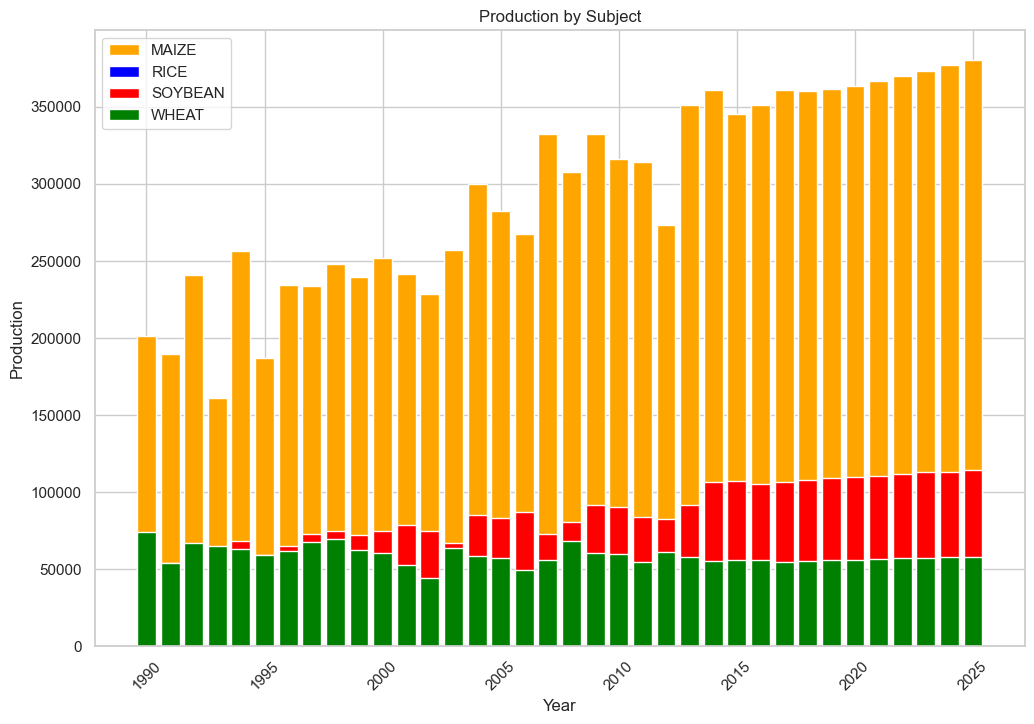

In [903]:
# crop production after 1980..

# Define a color palette for each subject
color_palette = {'RICE': 'blue', 'WHEAT': 'green', 'MAIZE': 'orange', 'SOYBEAN': 'red'}

# Filter the data to include only years after 1980
crops_df_filtered = crops_df[crops_df['TIME'] >= 1980]

# Create a single plot for all subjects
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

# Group the filtered data by subject
grouped_data = crops_df_filtered.groupby('SUBJECT')

# Iterate through each subject
for subject, group_data in grouped_data:
    # Plot the data for the current subject
    plt.bar(group_data['TIME'], group_data['VALUE'], color=color_palette[subject], label=subject)

# Add labels and title
plt.title('Production by Subject')
plt.xlabel('Year')
plt.ylabel('Production')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Show or save the plot
plt.show()  

# Save the combined plot as an image
# plt.savefig("combined_production_bar.png")

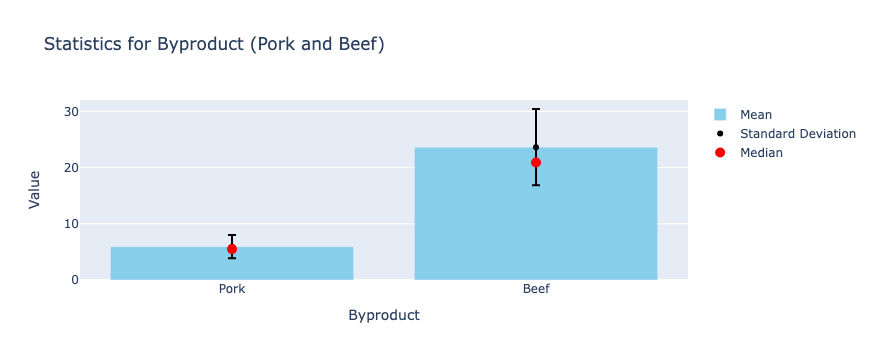

In [904]:
import plotly.graph_objects as go

# Data
categories = ['Pork', 'Beef']
means = [5.935185185185184, 23.631050228310496]
medians = [5.5, 20.9]
std_devs = [2.057510754920059, 6.7940069358671495]

# Create the figure
fig = go.Figure()

# Add mean bars
fig.add_trace(go.Bar(
    x=categories,
    y=means,
    name='Mean',
    marker_color='skyblue'
))

# Add standard deviation error bars
fig.add_trace(go.Scatter(
    x=categories,
    y=means,
    error_y=dict(
        type='data',
        array=std_devs,
        visible=True
    ),
    mode='markers',
    name='Standard Deviation',
    marker=dict(color='black')
))

# Add median points
fig.add_trace(go.Scatter(
    x=categories,
    y=medians,
    mode='markers',
    name='Median',
    marker=dict(color='red', size=10)
))

# Update layout
fig.update_layout(
    title='Statistics for Byproduct (Pork and Beef)',
    xaxis_title='Byproduct',
    yaxis_title='Value',
    barmode='group'
)

# Save the plot as an image file
# fig.write_image("statistics_plotly.png")

# Show the plot
fig.show()


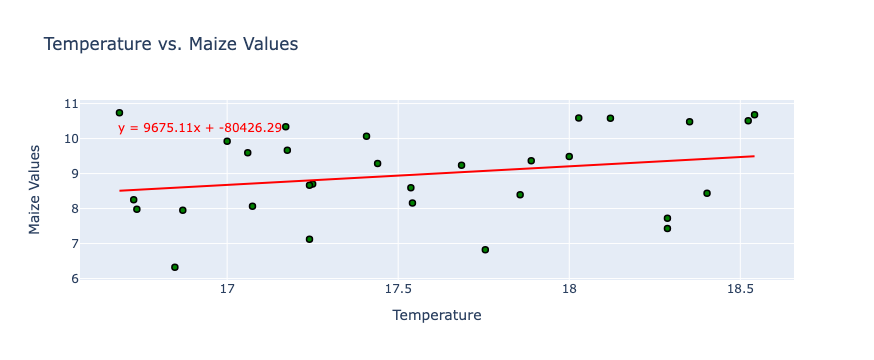

In [901]:
#Temp and Maize plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(climate_maize_df, x="tempc", y="VALUE", trendline="ols", 
                 trendline_color_override="red", labels={"tempc": "Temperature", "VALUE": "Maize Values"},
                 title="Temperature vs. Maize Values")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

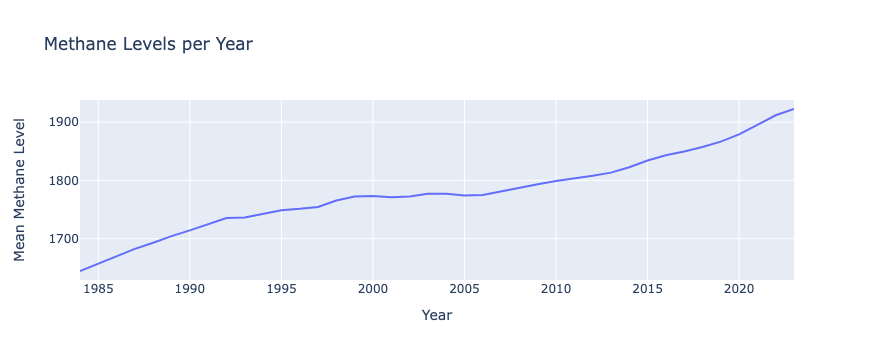

In [892]:
# Methane levels plotly

# Create the interactive plot using Plotly
fig = px.line(methane_df, x="Year", y="mean",
              title="Methane Levels per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Mean Methane Level")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

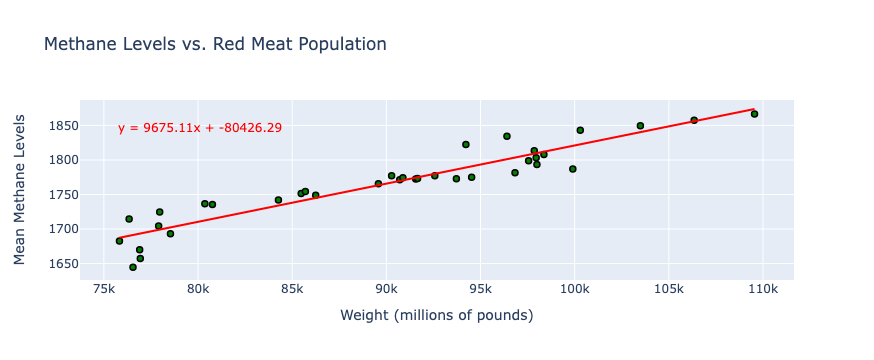

In [893]:
# production of red meat using plotly

# Scatter plot with regression line using Plotly Express
fig = px.scatter(methane_red_df, x="total_red_meat", y="mean", trendline="ols", 
                 trendline_color_override="red", labels={"mean": "Mean Methane Levels", "total_red_meat": "Weight (millions of pounds)"},
                 title="Methane Levels vs. Red Meat Population")
fig.update_traces(marker=dict(color='green', line=dict(color='black', width=1.5)))

# Display equation of the regression line
fig.add_annotation(
    x=0.05,
    y=0.9,
    xref="paper",
    yref="paper",
    text=f"y = {slope:.2f}x + {intercept:.2f}",
    showarrow=False,
    font=dict(color="red", size=12)
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("red_meat_population_regression_plotly.png")

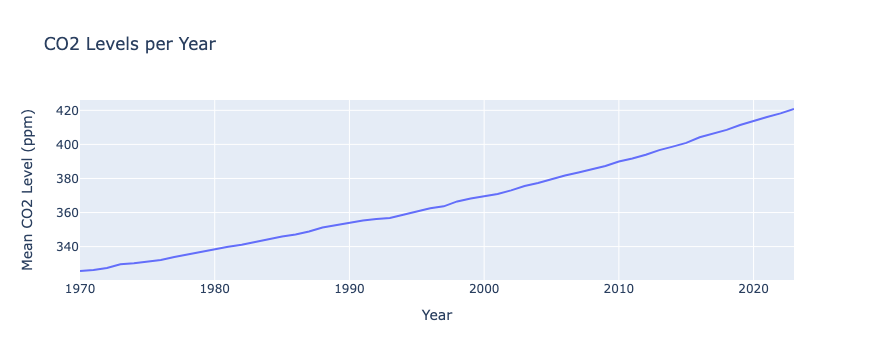

In [894]:
# CO2 levels plotly

# Create the interactive plot using Plotly
fig = px.line(co2_df, x="Year", y="CO2_ppm",
              title="CO2 Levels per Year")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Mean CO2 Level (ppm)")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

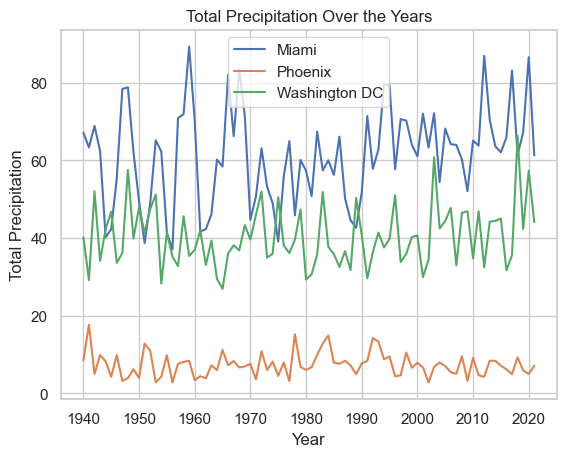

In [895]:
# Precipitation Totals 
fig = plt.figure()

for frame in [miami_df, phoenix_df, dc_df]:
    plt.plot(frame["Year"], frame["ToT Prcp"])

plt.xlabel("Year")
plt.ylabel("Total Precipitation")
plt.title("Total Precipitation Over the Years")
plt.legend(["Miami", "Phoenix", "Washington DC"])

# Save the plot
# plt.savefig("monthly_land_average_temperature.png")

plt.show()

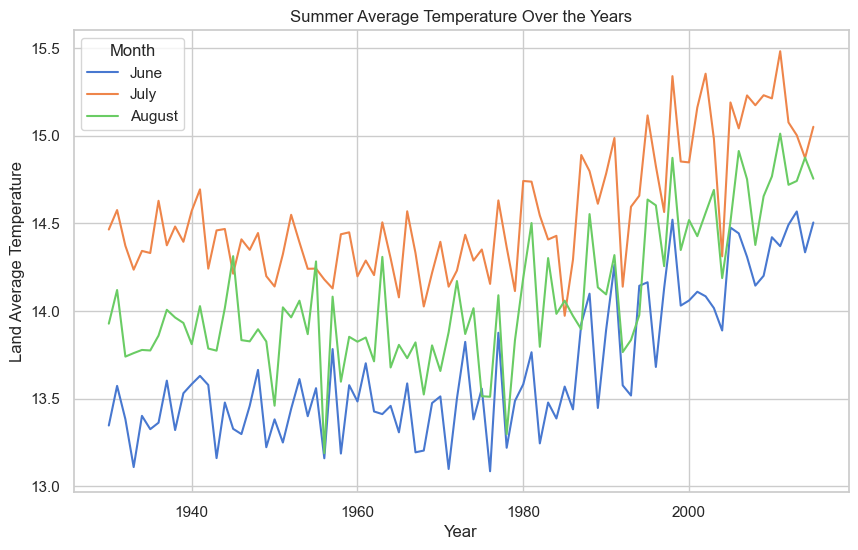

In [896]:
# Land average temp for June, july August using Seaborn
# Concatenate the data frames and add a "Month" column to use seaborn 
june_df["Month"] = "June"
july_df["Month"] = "July"
august_df["Month"] = "August"
concatenated_df = pd.concat([june_df, july_df, august_df], ignore_index=True)

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=concatenated_df, x="Year", y="LandAverageTemperature", hue="Month", palette="muted")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Land Average Temperature")
plt.title("Summer Average Temperature Over the Years")

# Save the plot
# plt.savefig("monthly_land_average_temperature_seaborn.png")

plt.show()

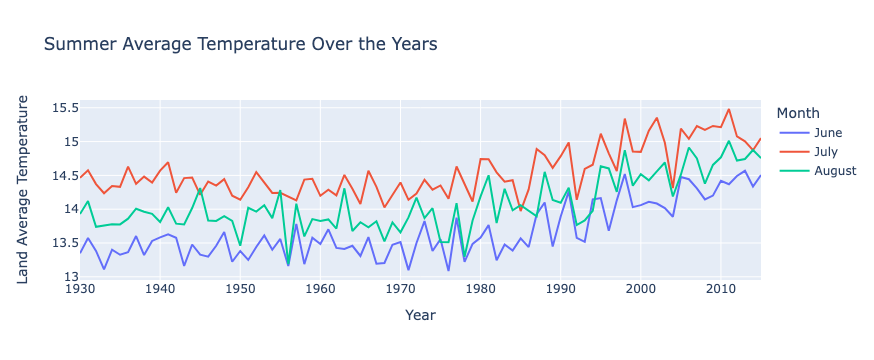

In [897]:
# Land average temp for June, july August using plotly 

# Concatenate the data frames and add a "Month" column
june_df["Month"] = "June"
july_df["Month"] = "July"
august_df["Month"] = "August"
concatenated_df = pd.concat([june_df, july_df, august_df], ignore_index=True)

# Create the interactive plot using Plotly
fig = px.line(concatenated_df, x="Year", y="LandAverageTemperature", color="Month",
              title="Summer Average Temperature Over the Years")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Land Average Temperature")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

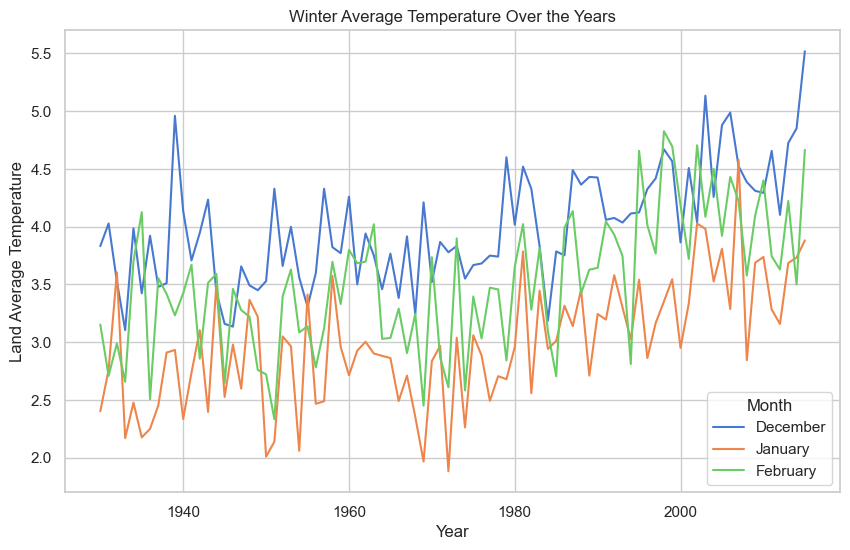

In [898]:
# Land average temp for June, july August using Seaborn
# Concatenate the data frames and add a "Month" column to use seaborn 
dec_df["Month"] = "December"
jan_df["Month"] = "January"
feb_df["Month"] = "February"
concatenated_df = pd.concat([dec_df, jan_df, feb_df], ignore_index=True)

# Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=concatenated_df, x="Year", y="LandAverageTemperature", hue="Month", palette="muted")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Land Average Temperature")
plt.title("Winter Average Temperature Over the Years")

# Save the plot
# plt.savefig("monthly_land_average_temperature_seaborn.png")

plt.show()

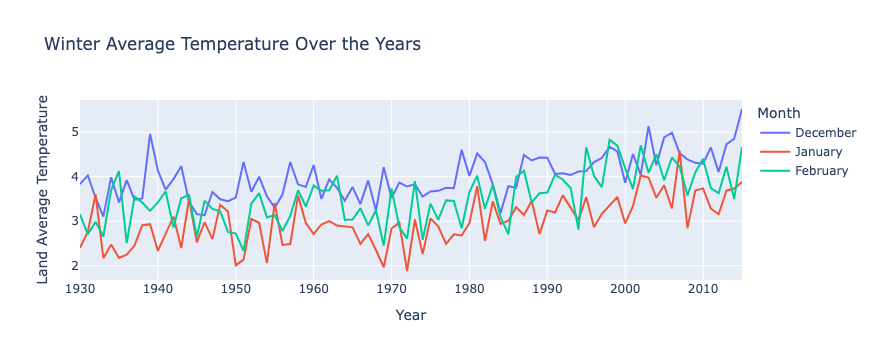

In [899]:
# Land average temp for June, july August using plotly 

# Concatenate the data frames and add a "Month" column
dec_df["Month"] = "December"
jan_df["Month"] = "January"
feb_df["Month"] = "February"
concatenated_df = pd.concat([dec_df, jan_df, feb_df], ignore_index=True)

# Create the interactive plot using Plotly
fig = px.line(concatenated_df, x="Year", y="LandAverageTemperature", color="Month",
              title="Winter Average Temperature Over the Years")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Land Average Temperature")

# Save the plot as an image file
# fig.write_image("monthly_land_average_temperature_plotly.png")

fig.show()

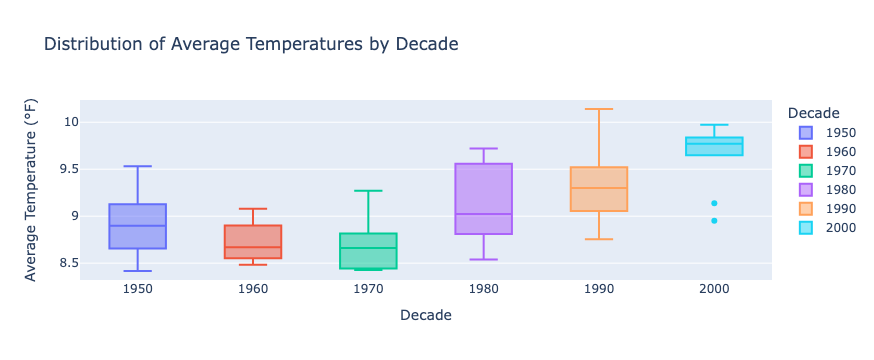

In [902]:
# Calculate the decade for each year
us_temps_grouped_df["Decade"] = (us_temps_grouped_df["Year"] // 10) * 10

# Create the box plot using Plotly Express
fig = px.box(us_temps_grouped_df, x="Decade", y="AverageTemperature", color="Decade",
             labels={"Decade": "Decade", "AverageTemperature": "Average Temperature (°F)"},
             title="Distribution of Average Temperatures by Decade")

# Update layout
fig.update_layout(
    xaxis_title="Decade",
    yaxis_title="Average Temperature (°F)",
)

# Show the plot
fig.show()

# Save the plot as an image
# fig.write_image("average_temperature_boxplot_per_decade_plotly.png")

# Plots

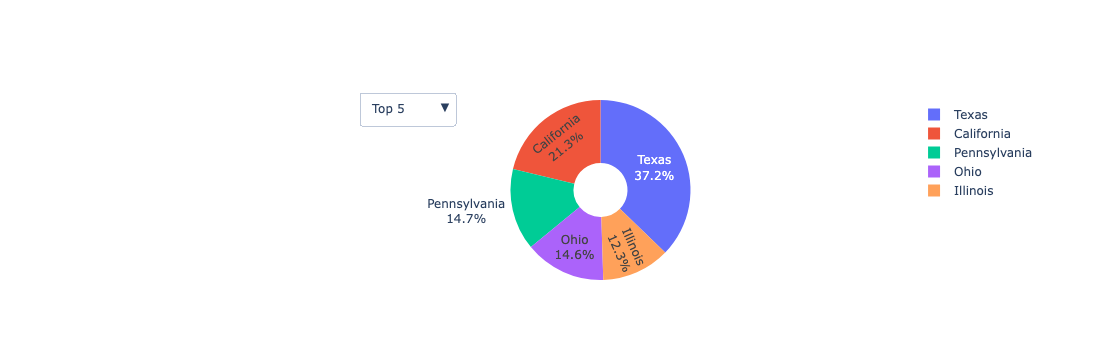

In [887]:
# Create a list of options for the dropdown menu
dropdown_options = [
    {'label': 'Top 5 States with Highest CO2 Emissions', 'value': 'top'},
    {'label': 'Top 5 States with Lowest CO2 Emissions', 'value': 'bottom'}
]

# Define a function to generate pie chart based on selected option
def generate_pie_chart(option):
    if option == 'top':
        data = top_5_states_df
        title = 'Top 5 States with Highest CO2 Emissions'
    elif option == 'bottom':
        data = bottom_5_states_df
        title = 'Top 5 States with Lowest CO2 Emissions'
    
    # Create pie chart
    fig = go.Figure(data=[go.Pie(labels=data['State'], values=data['Emissions'], 
                                  textinfo='label+percent', hole=0.3)])
    fig.update_layout(title=title)
    return fig

# Initialize the Plotly figure
fig = go.Figure()

# Add both pie charts to the figure but make the bottom one initially invisible
fig.add_trace(go.Pie(labels=top_5_states_df['State'], values=top_5_states_df['Emissions'], 
                     textinfo='label+percent', hole=0.3, visible=True))
fig.add_trace(go.Pie(labels=bottom_5_states_df['State'], values=bottom_5_states_df['Emissions'], 
                     textinfo='label+percent', hole=0.3, visible=False))

# Update layout to include dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{'visible': [True, False]}],
                    label='Top 5',
                    method='update'
                ),
                dict(
                    args=[{'visible': [False, True]}],
                    label='Bottom 5',
                    method='update'
                )
            ]),
            direction='down',
            pad={'r': 10, 't': 10},
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.1,
            yanchor='top'
        )
    ]
)

# Display the interactive plot
pyo.iplot(fig)



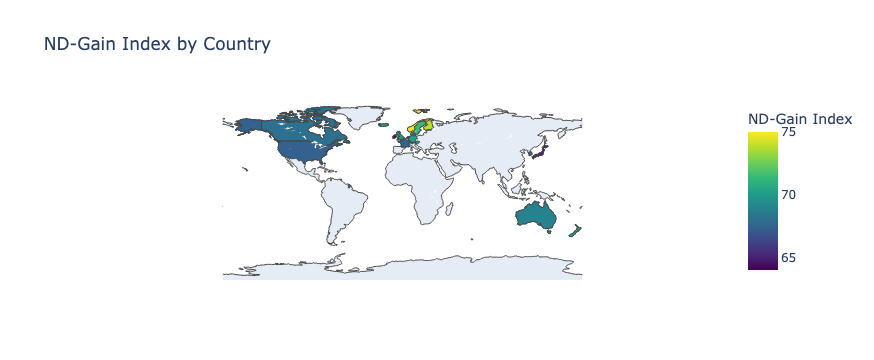

In [906]:
# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=high_countries_df['Country'],  # Country codes
    z=high_countries_df['ND-Gain Index'],  # ND-Gain Index values
    locationmode='country names',  # Set of locations match entries in `locations`
    colorscale='Viridis',
    colorbar_title='ND-Gain Index',
))

# Update layout
fig.update_layout(
    title_text='ND-Gain Index by Country',
    geo=dict(
        showframe=False,
        projection_type='equirectangular'
    )
)

# Save the figure as an HTML file
# fig.write_html("ND-Gain_Index_Map.html")